<a href="https://colab.research.google.com/github/finix353/webdev-pial/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Loading :**

a.Import a dataset of your choice (e.g., California Housing, Boston Housing, or
custom CSV
data).
b.Identify the target and predictor variables.
c.Check for missing values, data types, and outliers.







Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Predictor Variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target Variable: target

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Data Types:
 MedInc        float64
HouseAge      float64
AveRooms 

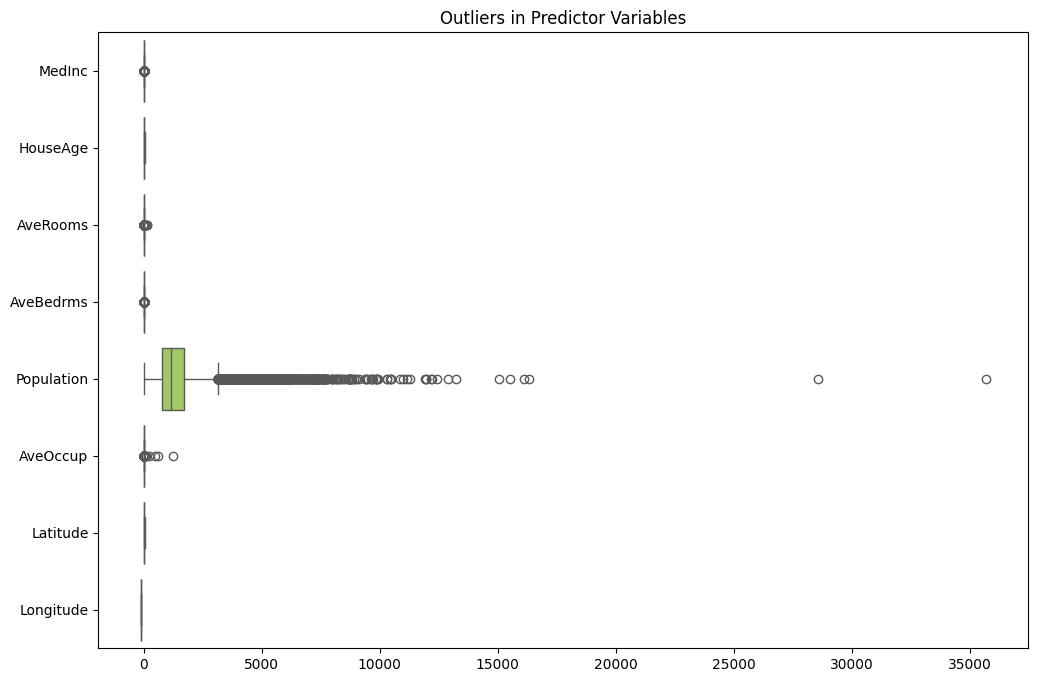

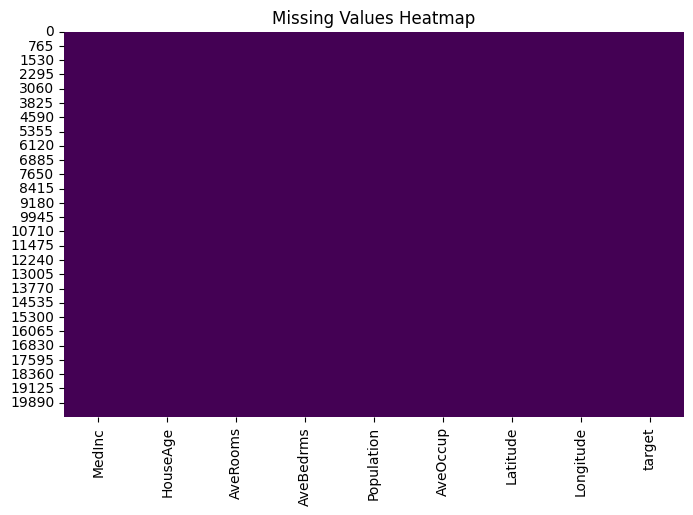

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)
data = housing.data
data['target'] = housing.target  # Add target variable to the dataset

# Display dataset overview
print("Dataset Overview:")
print(data.head())

# Identify predictors and target variable
predictors = data.columns[:-1]  # All columns except 'target'
target = 'target'
print("\nPredictor Variables:", predictors.tolist())
print("Target Variable:", target)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check data types
print("\nData Types:\n", data.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", data.describe())

# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[predictors], orient="h", palette="Set2")
plt.title("Outliers in Predictor Variables")
plt.show()

# Visualize missing values (if any)
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

**Data Preprocessing :**

**2.Handling Missing Values:** Import a dataset with missing values. Demonstrate methods to
handle them (e.g., mean/mode/median imputation, dropping rows/columns) and analyze
how this affects the regression model’s performance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
housing = fetch_california_housing(as_frame=True)
data = housing.data
data['target'] = housing.target

print("Missing Values Per Column:\n", data.isnull().sum())

# Split predictors and target variable
X = data.iloc[:, :-1]
y = data['target']

# Handle missing values
methods = {
    "mean": X.fillna(X.mean()),
    "median": X.fillna(X.median()),
    "mode": X.fillna(X.mode().iloc[0]),
    "drop_rows": X.dropna(),
}
if "drop_rows" in methods:
    y_dropped = y.loc[methods["drop_rows"].index]

# Train and evaluate the model for each method
results = {}
for method, X_processed in methods.items():
    if method == "drop_rows":
        X_train, X_test, y_train, y_test = train_test_split(methods["drop_rows"], y_dropped, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[method] = {"MSE": mse, "R²": r2}

# Compare results
print("\nModel Performance with Different Missing Value Handling Methods:")
for method, metrics in results.items():
    print(f"{method.capitalize()} Imputation -> MSE: {metrics['MSE']:.4f}, R²: {metrics['R²']:.4f}")


Missing Values Per Column:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Model Performance with Different Missing Value Handling Methods:
Mean Imputation -> MSE: 0.5559, R²: 0.5758
Median Imputation -> MSE: 0.5559, R²: 0.5758
Mode Imputation -> MSE: 0.5559, R²: 0.5758
Drop_rows Imputation -> MSE: 0.5559, R²: 0.5758


**3.Scalling and Normalization:** Import a dataset with features on different scales. Perform
normalization (e.g., Min-Max Scaling) and standardization (e.g., z-score). Compare the
impact of these preprocessing steps on the performance of a linear regression model.

Mean Squared Error (No Scaling): 0.009689973182811019
Mean Squared Error (Min-Max Scaling): 0.009689973183018476
Mean Squared Error (Standardization): 0.009689973183012245

Comparison of Model Performance:
Mean Squared Error (No Scaling): 0.009689973182811019
Mean Squared Error (Min-Max Scaling): 0.009689973183018476
Mean Squared Error (Standardization): 0.009689973183012245


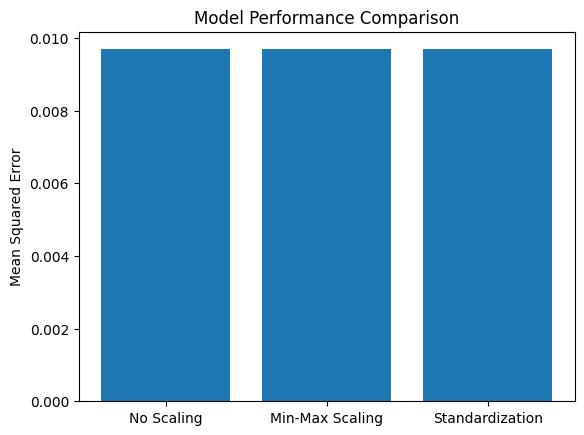

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generating a synthetic dataset with 5 features and adding varying scales
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Adding varying scales to the features
X[:, 0] = X[:, 0] * 100  # Feature 1 with a larger scale
X[:, 1] = X[:, 1] * 0.01  # Feature 2 with a smaller scale

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Applying Standardization (Z-Score)
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Train Linear Regression model and evaluate performance

# Without scaling (baseline performance)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (No Scaling): {mse_baseline}")

# With Min-Max Scaling
model.fit(X_train_minmax, y_train)
y_pred_minmax = model.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
print(f"Mean Squared Error (Min-Max Scaling): {mse_minmax}")

# With Standardization (Z-Score)
model.fit(X_train_standard, y_train)
y_pred_standard = model.predict(X_test_standard)
mse_standard = mean_squared_error(y_test, y_pred_standard)
print(f"Mean Squared Error (Standardization): {mse_standard}")

# Comparing the MSE values
print("\nComparison of Model Performance:")
print(f"Mean Squared Error (No Scaling): {mse_baseline}")
print(f"Mean Squared Error (Min-Max Scaling): {mse_minmax}")
print(f"Mean Squared Error (Standardization): {mse_standard}")

# Plotting the MSE comparison
labels = ['No Scaling', 'Min-Max Scaling', 'Standardization']
mse_values = [mse_baseline, mse_minmax, mse_standard]

plt.bar(labels, mse_values)
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()

**4.Categorical Data Encoding:** Use a dataset with categorical features. Demonstrate how to
apply label encoding and one hot encoding. Train a regression model and compare results
using these encoding techniques.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Step 1: Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select relevant features and target
features = ['Pclass', 'Sex', 'Embarked', 'Age', 'Fare']
target = 'Survived'

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Confirm that no missing values remain
assert df[features].isnull().sum().sum() == 0, "Missing values are still present in the features."

X = df[features]
y = df[target]

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debug: Print shapes of splits to ensure valid train-test split
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Step 3a: Apply Label Encoding
X_train_label = X_train.copy()
X_test_label = X_test.copy()

label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

# Apply Label Encoding to categorical columns
X_train_label['Sex'] = label_encoder_sex.fit_transform(X_train['Sex'])
X_train_label['Embarked'] = label_encoder_embarked.fit_transform(X_train['Embarked'])

X_test_label['Sex'] = label_encoder_sex.transform(X_test['Sex'])
X_test_label['Embarked'] = label_encoder_embarked.transform(X_test['Embarked'])

# Debug: Print example of encoded data
print("\nLabel Encoded Data Example:")
print(X_train_label.head())

# Train a Logistic Regression model with Label Encoding
model_label = LogisticRegression(max_iter=500)
model_label.fit(X_train_label, y_train)
y_pred_label = model_label.predict(X_test_label)

# Evaluate the model with Label Encoding
accuracy_label = accuracy_score(y_test, y_pred_label)

# Step 3b: Apply One-Hot Encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), ['Sex', 'Embarked']),
    ],
    remainder='passthrough'
)

X_train_onehot = column_transformer.fit_transform(X_train)
X_test_onehot = column_transformer.transform(X_test)

# Debug: Print shape of transformed data
print("\nOne-Hot Encoded Data Shape:")
print(f"Train: {X_train_onehot.shape}, Test: {X_test_onehot.shape}")

# Train a Logistic Regression model with One-Hot Encoding
model_onehot = LogisticRegression(max_iter=500)
model_onehot.fit(X_train_onehot, y_train)
y_pred_onehot = model_onehot.predict(X_test_onehot)

# Evaluate the model with One-Hot Encoding
accuracy_onehot = accuracy_score(y_test, y_pred_onehot)

print("\nPerformance with Label Encoding:")
print(f"Accuracy: {accuracy_label:.2f}")

print("\nPerformance with One-Hot Encoding:")
print(f"Accuracy: {accuracy_onehot:.2f}")

Training set size: 712, Test set size: 179

Label Encoded Data Example:
     Pclass  Sex  Embarked   Age     Fare
331       1    1         2  45.5  28.5000
733       2    1         2  23.0  13.0000
382       3    1         2  32.0   7.9250
704       3    1         2  26.0   7.8542
813       3    0         2   6.0  31.2750

One-Hot Encoded Data Shape:
Train: (712, 6), Test: (179, 6)

Performance with Label Encoding:
Accuracy: 0.80

Performance with One-Hot Encoding:
Accuracy: 0.80


**Feature Engineering :**

**5.Feature Selection using LASSO Regression:** Use a given dataset to perform regression using
LASSO (Least Absolute Shrinkage and Selection Operator). Identify the features selected by
LASSO, train the regression model, and evaluate its performance using metrics like R², RMSE,
and MAE.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target  # Median House Value

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize features (important for LASSO regularization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply LASSO Regression
alpha_value = 0.1  # Regularization strength; tune this value as needed
lasso = Lasso(alpha=alpha_value, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Step 5: Identify selected features
selected_features = np.array(X.columns)[lasso.coef_ != 0]  # Features with non-zero coefficients
non_zero_coefficients = lasso.coef_[lasso.coef_ != 0]

print("Selected Features by LASSO:")
for feature, coef in zip(selected_features, non_zero_coefficients):
    print(f"{feature}: {coef:.4f}")

# Step 6: Evaluate the model
y_pred = lasso.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nLASSO Regression Performance Metrics:")
print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Selected Features by LASSO:
MedInc: 0.7106
HouseAge: 0.1065
Latitude: -0.0115

LASSO Regression Performance Metrics:
R²: 0.48
RMSE: 0.82
MAE: 0.62


**6. Correlation-Based Feature Selection:** Perform feature selection based on correlation
analysis. Remove highly correlated features (e.g., correlation &gt; 0.85) and train a regression
model on the remaining features. Evaluate the model using R², RMSE, MAE, and compare its
performance with a model trained on the original dataset.

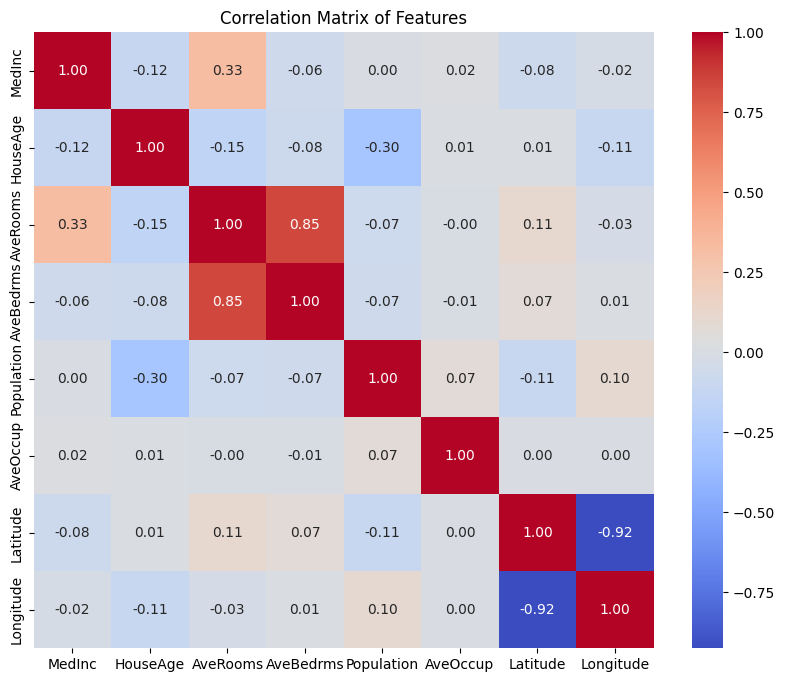

Highly correlated features (|correlation| > 0.85): {'Longitude'}

Performance on Original Dataset:
R²: 0.58
RMSE: 0.75
MAE: 0.53

Performance on Reduced Dataset:
R²: 0.51
RMSE: 0.80
MAE: 0.58

Comparison of Model Performance:
Original Dataset: R² = 0.58, RMSE = 0.75, MAE = 0.53
Reduced Dataset: R² = 0.51, RMSE = 0.80, MAE = 0.58


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target  # Median House Value

# Step 2: Correlation Analysis
correlation_matrix = X.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Remove highly correlated features (correlation > 0.85)
threshold = 0.85
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Highly correlated features (|correlation| > {threshold}):", correlated_features)

# Step 3: Prepare datasets
X_reduced = X.drop(columns=correlated_features)  # Drop highly correlated features

# Split the datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Step 4: Train and evaluate models
def train_and_evaluate_model(X_train, X_test, y_train, y_test, description):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"\nPerformance on {description}:")
    print(f"R²: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    return r2, rmse, mae

# Original dataset
r2_original, rmse_original, mae_original = train_and_evaluate_model(
    X_train, X_test, y_train, y_test, "Original Dataset"
)

# Reduced dataset
r2_reduced, rmse_reduced, mae_reduced = train_and_evaluate_model(
    X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced, "Reduced Dataset"
)

# Step 5: Compare results
print("\nComparison of Model Performance:")
print(f"Original Dataset: R² = {r2_original:.2f}, RMSE = {rmse_original:.2f}, MAE = {mae_original:.2f}")
print(f"Reduced Dataset: R² = {r2_reduced:.2f}, RMSE = {rmse_reduced:.2f}, MAE = {mae_reduced:.2f}")


**Model Evaluation :**

**7. Regularization Techniques:**
Ridge and Lasso : Train Ridge and Lasso regression models on a
dataset with multicollinearity (e.g., diabetes dataset). Compare the regularization effects by
varying hyperparameters (α or λ) and observing their impact on model performance and
feature coefficients.

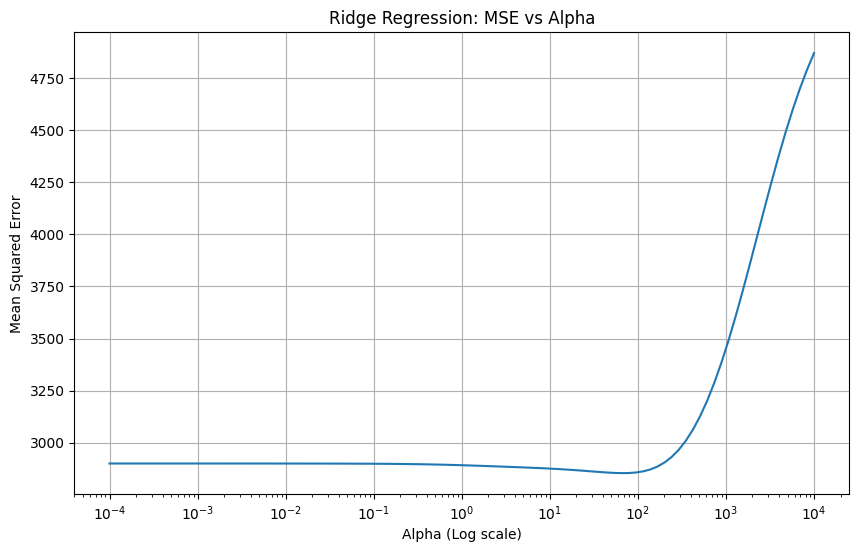

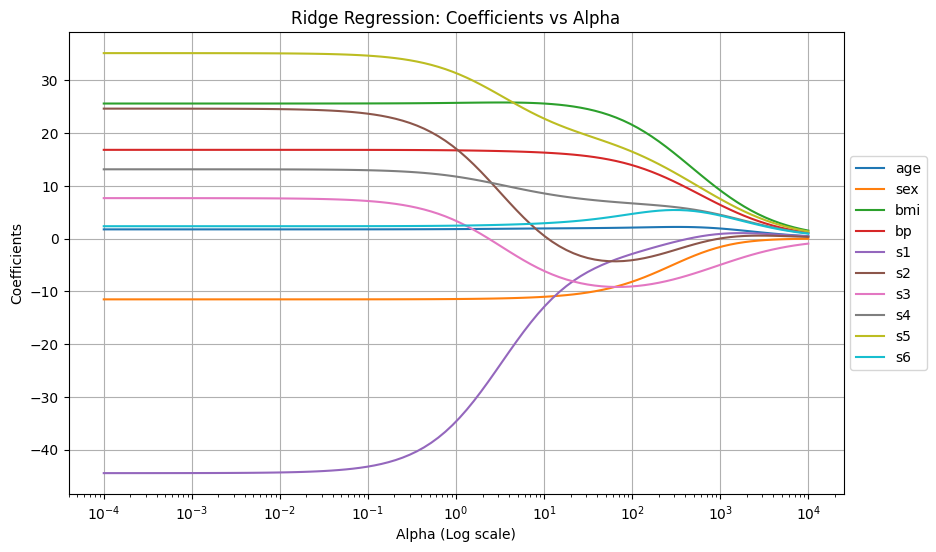

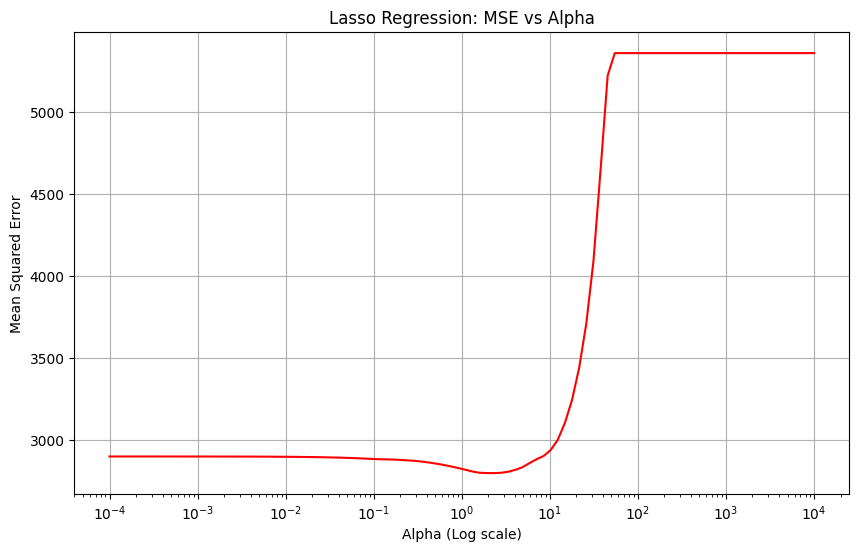

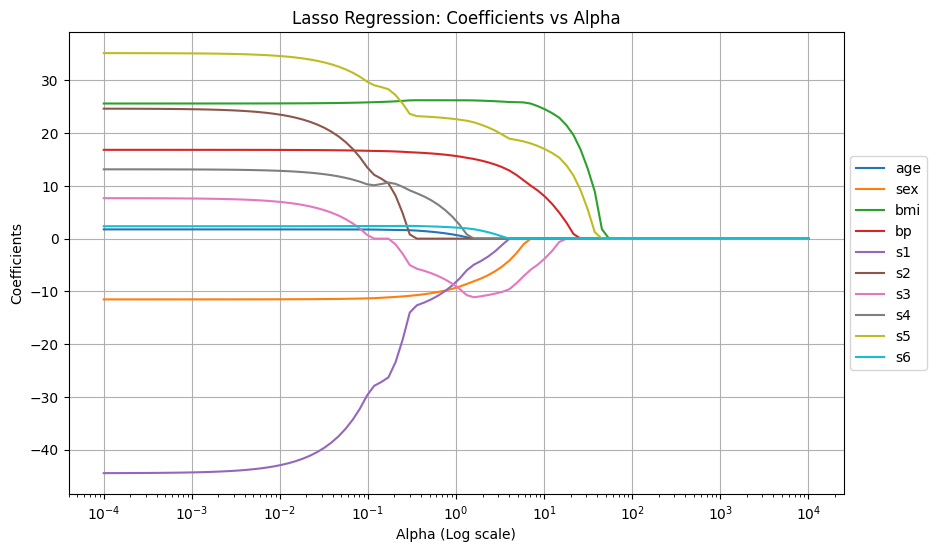

Optimal alpha for Ridge: 1.3219411484660315
Optimal alpha for Lasso: 1.592282793341094
Ridge MSE: 2890.3746951182975
Lasso MSE: 2800.9486389473354


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# Step 1: Load and Preprocess the Data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Ridge and Lasso Regression Models
# Varying values of alpha for Ridge regression
alphas_ridge = np.logspace(-4, 4, 100)
mse_ridge = []
coefficients_ridge = []

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    # Store MSE and coefficients
    y_pred_ridge = ridge.predict(X_test_scaled)
    mse_ridge.append(mean_squared_error(y_test, y_pred_ridge))
    coefficients_ridge.append(ridge.coef_)

# Plot MSE vs Alpha for Ridge regression
plt.figure(figsize=(10, 6))
plt.plot(alphas_ridge, mse_ridge, label="Ridge MSE")
plt.xscale('log')
plt.xlabel('Alpha (Log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: MSE vs Alpha')
plt.grid(True)
plt.show()

# Plot coefficient paths for Ridge
plt.figure(figsize=(10, 6))
for i in range(X_train.shape[1]):
    plt.plot(alphas_ridge, [coef[i] for coef in coefficients_ridge], label=diabetes.feature_names[i])
plt.xscale('log')
plt.xlabel('Alpha (Log scale)')
plt.ylabel('Coefficients')
plt.title('Ridge Regression: Coefficients vs Alpha')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

# Varying values of alpha for Lasso regression
alphas_lasso = np.logspace(-4, 4, 100)
mse_lasso = []
coefficients_lasso = []

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)

    # Store MSE and coefficients
    y_pred_lasso = lasso.predict(X_test_scaled)
    mse_lasso.append(mean_squared_error(y_test, y_pred_lasso))
    coefficients_lasso.append(lasso.coef_)

# Plot MSE vs Alpha for Lasso regression
plt.figure(figsize=(10, 6))
plt.plot(alphas_lasso, mse_lasso, label="Lasso MSE", color='red')
plt.xscale('log')
plt.xlabel('Alpha (Log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: MSE vs Alpha')
plt.grid(True)
plt.show()

# Plot coefficient paths for Lasso
plt.figure(figsize=(10, 6))
for i in range(X_train.shape[1]):
    plt.plot(alphas_lasso, [coef[i] for coef in coefficients_lasso], label=diabetes.feature_names[i])
plt.xscale('log')
plt.xlabel('Alpha (Log scale)')
plt.ylabel('Coefficients')
plt.title('Lasso Regression: Coefficients vs Alpha')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

# Step 3: Hyperparameter Tuning with Cross-Validation
# RidgeCV with the updated parameter
ridge_cv = RidgeCV(alphas=alphas_ridge, store_cv_results=True)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=alphas_lasso)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Optimal alpha for Ridge: {ridge_cv.alpha_}")
print(f"Optimal alpha for Lasso: {lasso_cv.alpha_}")

# Evaluate the models on test data
ridge_pred = ridge_cv.predict(X_test_scaled)
lasso_pred = lasso_cv.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Ridge MSE: {ridge_mse}")
print(f"Lasso MSE: {lasso_mse}")

**8. Model Evaluation with Cross-Validation :** Use k-fold cross-validation to train and evaluate a regression model. Report metrics such as MSE, R², MAE, and RMSE for each fold. Compare performance with and without cross-validation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
# Step 1: Load and Preprocess the Data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the Model (Ridge Regression)
ridge = Ridge(alpha=1.0)  # You can choose other regression models as needed

# Step 3: Perform k-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Store results
mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

# Cross-validation loop
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model
    ridge.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_val_pred = ridge.predict(X_val_fold)

    # Evaluate performance
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)
    rmse = np.sqrt(mse)

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Print the performance metrics for each fold
print(f"Performance metrics for each fold:")
print(f"MSE: {mse_scores}")
print(f"MAE: {mae_scores}")
print(f"R²: {r2_scores}")
print(f"RMSE: {rmse_scores}")

# Report average performance across all folds
print("\nAverage performance across all folds:")
print(f"Average MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")

# Step 4: Train and Evaluate the Model Without Cross-Validation
ridge.fit(X_train_scaled, y_train)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# Calculate metrics for the model without cross-validation
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print metrics for training and testing sets
print("\nMetrics for model trained without cross-validation:")
print(f"Training MSE: {mse_train:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Testing MAE: {mae_test:.4f}")
print(f"Testing R²: {r2_test:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")

Performance metrics for each fold:
MSE: [2849.5427864865487, 3213.2701780813313, 2802.806754275579, 2971.8988478544857, 3522.7467971891874]
MAE: [44.47307103421474, 48.210287957511106, 42.6819927796977, 44.42535920809642, 45.219912353194665]
R²: [0.4699781473288711, 0.5380424050598864, 0.41333665752309523, 0.4902589101406365, 0.4922130181566443]
RMSE: [53.38110889150345, 56.68571405637695, 52.941540913309076, 54.51512494578441, 59.352732011165145]

Average performance across all folds:
Average MSE: 3072.0531
Average MAE: 45.0021
Average R²: 0.4808
Average RMSE: 55.3752

Metrics for model trained without cross-validation:
Training MSE: 2870.2961
Training MAE: 43.4947
Training R²: 0.5276
Training RMSE: 53.5751
Testing MSE: 2892.0146
Testing MAE: 42.8120
Testing R²: 0.4541
Testing RMSE: 53.7775


**9. Regression Model Comparison :**Train multiple regression models (e.g., Linear Regression,
Ridge, and Lasso) on the same dataset. Compare them based on evaluation metrics such as
MAE, MSE, RMSE, and R². Discuss the scenarios where each model performs better.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Train the models
linear_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)
lasso_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Evaluate each model
metrics_linear = calculate_metrics(y_test, y_pred_linear)
metrics_ridge = calculate_metrics(y_test, y_pred_ridge)
metrics_lasso = calculate_metrics(y_test, y_pred_lasso)

# Print the results
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
metrics = [metrics_linear, metrics_ridge, metrics_lasso]
metric_names = ['MSE', 'MAE', 'RMSE', 'R²']

print(f"{'Model':<20}{'MSE':<10}{'MAE':<10}{'RMSE':<10}{'R²':<10}")
for i, model in enumerate(models):
    print(f"{model:<20}{metrics[i][0]:<10.4f}{metrics[i][1]:<10.4f}{metrics[i][2]:<10.4f}{metrics[i][3]:<10.4f}")

Model               MSE       MAE       RMSE      R²        
Linear Regression   2900.1936 42.7941   53.8534   0.4526    
Ridge Regression    2892.0146 42.8120   53.7775   0.4541    
Lasso Regression    2884.6243 42.8052   53.7087   0.4555    
